# CLASE 1.6: Teoría de optimización.
---

## Introducción.
Dado que los algoritmos de machine learning son implementados por medio de un computador, las correspondientes formulaciones matemáticas suelen expresarse por medio de métodos de optimización numérica. Esta sección describe los métodos numéricos básicos para el entrenamiento de modelos de machine learning. El entrenamiento de este tipo de modelos, con frecuencia, consiste en la búsqueda de un buen conjunto de parámetros, y la noción de *”buen conjunto”* se determina mediante la **función objetivo** en un **modelo probabilístico**, de los cuales veremos ejemplos concretos en secciones posteriores. Dada una función objetivo, buscar su *“mejor valor”* es, por tanto, un **problema de optimización**.

En esta sección cubriremos dos ramas principales referidas a la optimización de funciones continuas, las cuales se resumen fundamentalmente en **problemas no restringidos y restringidos**. Asumiremos, sin perder generalidad, que nuestra función objetivo es diferenciable, y por lo tanto, tenemos acceso a su gradiente en cada punto de su dominio, a fin de encontrar su valor máximo o mínimo. Por convención, en machine learning, intentamos buscar el mínimo valor de la mayoría de las funciones objetivo; es decir, el ”mejor valor” al que nos referimos previamente corresponde a dicho valor mínimo. Intuitivamente, y en ese mismo contexto, la búsqueda del “mejor valor” equivale a buscar los ”valles” en el gráfico de nuestra función objetivo (algo que, naturalmente, tiene sentido visual cuando su gráfico “vive” en $\mathbb{R}^{2}$ o en $\mathbb{R}^{3}$, pero que sigue siendo cierto en dimensiones superiores), considerando además que los correspondientes gradientes apuntan “cerro arriba”. La idea, por tanto, es movernos “cerro abajo” (en contra de la dirección del gradiente) y, con suerte, llegar al valle más profundo descrito por el gráfico de la función objetivo. Para el caso de los problemas no restringidos, esta será la única noción (a nivel conceptual) que necesitaremos. Por otro lado, para problemas restringidos, necesitamos introducir otros conceptos para poder administrar las restricciones que gobiernan el problema. También introduciremos una clase especial de problemas (llamados **problemas de optimización convexa**, que nos permitirá tomar ciertos supuestos importantes relativos tanto a la función objetivo como al conjunto de ecuaciones o inecuaciones que definan las restricciones del problema.

En esta oportunidad, haremos uso de código de Python de forma un poquito más intensiva. Netamente para ilustrar gráficamente algunos ejemplos, por lo cual haremos las importaciones habituales:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Setting de parámetros por defecto para nuestras figuras.
plt.rcParams["figure.dpi"] = 100
sns.set()
plt.style.use("bmh")

In [3]:
%matplotlib notebook

Consideremos pues la función $f(x)=x^{4}+7x^{3}+5x^{2}-17x+3$, y construyamos su gráfico haciendo uso de **<font color='mediumorchid'>Matplotlib</font>**. Para ello, tomaremos como base el rango de valores $-6\leq x\leq 2$, con lo cual:

In [4]:
# Construimos la función anterior.
X = np.linspace(start=-6, stop=2, num=50)
Y = X**4 + 7*X**3 + 5*X**2 - 17*X + 3

Y ahora sí graficamos el valor de `y`. Construiremos algunas anotaciones que nos serán de utilidad para explicar ciertos conceptos básicos:

<IPython.core.display.Javascript object>


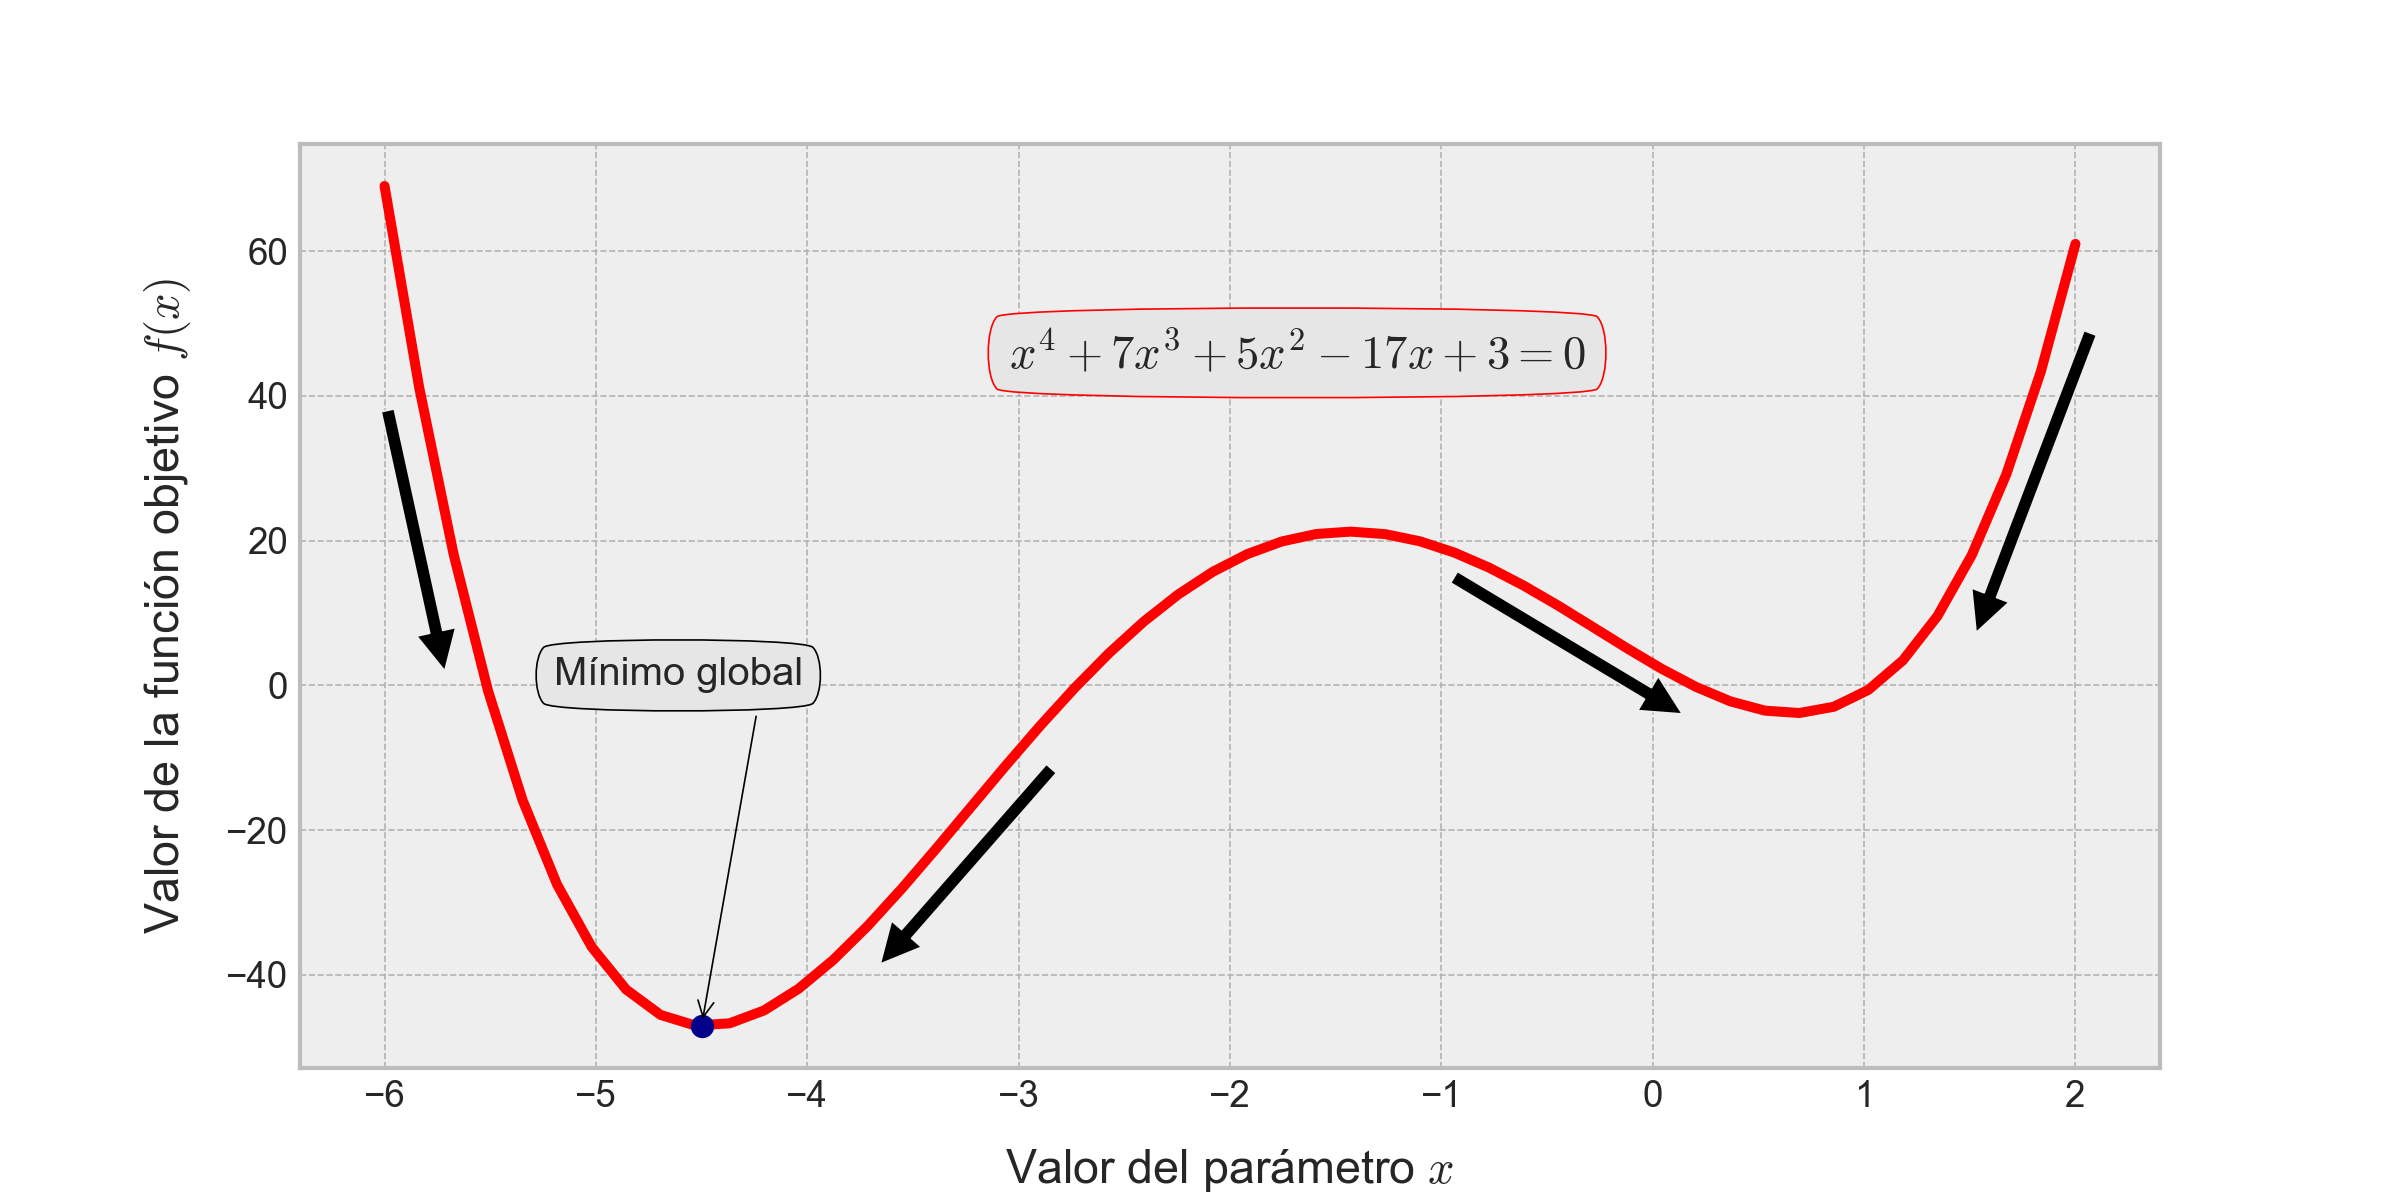

/var/folders/sn/hlgjzv2n1537dplx8bvvj1c80000gn/T/ipykernel_40802/1919616233.py:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(


In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X, Y, color="red", linewidth=3)
ax.annotate(
    "", xy=(-5.7, 0), xytext=(-6, 40), 
    arrowprops=dict(facecolor="black", shrink=0.05)
)
ax.annotate(
    "", xy=(-3.7, -40), xytext=(-2.8, -10), 
    arrowprops=dict(facecolor="black", shrink=0.05)
)
ax.annotate(
    "", xy=(0.2, -5), xytext=(-1, 16), 
    arrowprops=dict(facecolor="black", shrink=0.05)
)
ax.annotate(
    "", xy=(1.5, 5), xytext=(2.1, 51), 
    arrowprops=dict(facecolor="black", shrink=0.05)
)
ax.annotate(
    r"$x^{4}+7x^{3}+5x^{2}-17x+3=0$", xy=(-3, 30), xycoords='data',
    textcoords='offset points', fontsize=14,
    bbox=dict(boxstyle="round4,pad=.5", fc="0.9", color="red"),
)
ax.plot(-4.5, -47.0625, marker="o", color="darkblue")
ax.annotate(
    "Mínimo global", xy=(-4.5, -47), xytext=(-5.2, 0), xycoords='data',
    fontsize=12, bbox=dict(boxstyle="round4,pad=.5", fc="0.9", color="black"),
    arrowprops=dict(
        arrowstyle="->", 
        connectionstyle="angle,angleA=0,angleB=80,rad=20",
        color="black"
    ),
)
ax.set_xlabel(r"Valor del parámetro $x$", fontsize=14, labelpad=10)
ax.set_ylabel(r"Valor de la función objetivo $f(x)$", fontsize=14, labelpad=10);

A partir del gráfico anterior, podemos observar que $f$ tiene un **mínimo global** en torno al punto $x_{0}=-4.5$, siendo el valor que toma $f$ en dicho punto aproximadamente igual a $-47$. Dado que la gráfica de $f$ es *suave* (o, haciendo uso de un término técnico adecuado, **regular**), podemos utilizar el *gradiente* de $f$ para determinar ese mínimo global, lo que nos indicará si debemos avanzar hacia la izquierda o la derecha de $x_{0}$ en nuestro proceso de búsqueda. Por supuesto, esta lógica asume que estamos en el “valle” correcto, porque existe un valor **mínimo local** en torno a $x=0.7$. Los candidatos a valores máximos o mínimos de una función son todos los puntos estacionarios que cumplen con que su gradiente se anule en dichos puntos, llamados **puntos críticos**. Para la función $f$, el correspondiente gradiente (que, por ser una función univariante, coincide con su derivada) es

$$\frac{df\left( x\right)  }{dx} =4x^{3}+21x^{2}+10x-17$$
<p style="text-align: right;">$(6.1)$</p>

Debido a que (6.1) es una función cúbica, ésta tendrá un máximo de tres raíces reales. En este caso, estos puntos críticos representan dos mínimos y un máximo (en torno a $x=-1.4$). Para chequear si un punto crítico es un mínimo o un máximo, necesitamos calcular la segunda derivada de $f$ y determinar si ésta es positiva o negativa en dicho punto. En nuestro caso, la segunda derivada es

$$\frac{d^{2}f\left( x\right)  }{dx^{2}} =12x^{2}+42x+10$$
<p style="text-align: right;">$(6.2)$</p>

Sustituyendo los valores que *visualmente* hemos estimado como extremos de la función $f$ (digamos, $x_{1}=-4.5,x_{2}=-1.4$ y $x_{3}=0.7$), observamos que, como cabría esperar, el valor $x_{2}=-1.4$ es un máximo (ya que el [criterio de la segunda derivada para la búsqueda de extremos de una función](https://en.wikipedia.org/wiki/Derivative_test#Second-derivative_test_(single_variable)) nos permite llegar a dicha conclusión, porque $\frac{d^{2}f\left( -1.4\right)  }{dx^{2}} <0$), mientras que $x_{1}$ y $x_{3}$ representan valores mínimos.

Notemos que hemos evitado calcular analíticamente los valores de $x$ para los cuales la derivada $f'(x)$ es igual a cero, aunque para polinomios de orden bajo (como el de nuestro ejemplo), en general, podríamos hacerlo sin mayor problema. Sin embargo, en general, no es posible encontrar tales soluciones de forma analítica, y por lo tanto necesitamos de algún **valor inicial de búsqueda**, digamos $x_{0}=-6$, y movernos en la dirección opuesta de crecimiento del gradiente (es decir, la derivada). Tal dirección nos indica que deberíamos movernos a la derecha del gráfico de $f$, pero no demasiado lejos del punto inicial (lo que motiva la definición del **tamaño del paso**). Además, si hubiéramos partido más a la derecha, digamos en $x_{0}=0$, la dirección del gradiente negativo nos hubiera llevado hacia un **mínimo local**. El gráfico de $f$ que construimos previamente ilustra el hecho de que, para $x>-1$, el gradiente negativo apunta hacia dicho mínimo local, el cual que no es de nuestro interés.

Un poco más adelante, aprenderemos una clase de funciones llamadas **funciones convexas**, que no exhiben esta dependencia más o menos complicada con respecto a la solución inicial elegida para un algoritmo de optimización. Para el caso de las funciones convexas, **todos los mínimos locales son globales**. Y sucede además que, en machine learning, muchas f**unciones objetivo** están diseñadas para ser convexas. Veremos ejemplos de ellas más adelante.

Algo importante de notar, es que la discusión previa fue tan solo un adelanto de lo que veremos en esta sección, ya que el problema expuesto en el gráfico que hemos construido para $f$ involucra a una función de una variable, donde es fácil visualizar cualquier idea referida a gradientes, direcciones de decrecimiento de los mismos y los valores extremos que nos interesan en una función. En el resto de esta sección, extenderemos estas ideas a funciones en $\mathbb{R}^{n}$, con la salvedad de que será imposible “ver” estos conceptos de forma gráfica para $n>2$ (es decir, para funciones de más de dos variables). Además, algunos de los conceptos previamente presentados no son trivialmente extensibles a funciones en $\mathbb{R}^{n}$, por lo que tendremos que seguir ciertas reglas que iremos construyendo paso a paso.

## Algoritmo de gradiente descendente.
Supongamos que estamos perdidos en una densa niebla en las montañas, y que solamente podemos sentir el piso bajo nuestros pies, siendo nuestro objetivo llegar a nuestro hogar, situado en la parte más profunda del valle oculto en estas montañas. Una buena estrategia para llegar al fondo del valle rápidamente es ir caminando cuesta abajo por la pendiente más pronunciada que encontremos. Esto es exactamente lo que hace el **algoritmo de gradiente descendente** (GD): Determina el **gradiente local** de la función cuyo gráfico es precisamente el terreno montañoso, con respecto a la variable local (digamos $\mathbf{x}$), y luego **se desplaza en la dirección de descenso de dicho gradiente**. Una vez que el gradiente es cero, hemos llegado a la parte más profunda del valle, como era nuestro objetivo.

Formalicemos entonces esta idea: Vamos a considerar el problema relativo a minimizar una función de una variable vectorial del tipo $f:\mathbb{R}^{m}\longrightarrow \mathbb{R}$, y que podemos escribir como

$$\min_{\mathbf{x} } f\left( \mathbf{x} \right)$$
<p style="text-align: right;">$(6.3)$</p>

En este problema, $f$ es una función objetivo que captura el **problema de aprendizaje** de nuestro interés (aunque ojo, aún no definimos de manera rigurosa qué problema es éste, pero bastará con saber que es, efectivamente, un problema de optimización). Asumiremos que $f$ es diferenciable en, al menos, un conjunto abierto $U\subseteq \mathbb{R}^{m}$, y que, ya sea por un tema algebraico o por insuficiencia de recursos, no nos es posible determinar una solución analítica cerrada para el problema (6.3).

Gradiente descendente es pues un algoritmo de optimización de **primer orden**. Para encontrar el mínimo local de una función usando este algoritmo, vamos dando **pasos de magnitud proporcional al negativo del gradiente de la función en un punto dado**. Recordemos, de la [clase 1.4](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20I%20-%20Fundamentos%20matem%C3%A1ticos%20elementales/clase_1_4.ipynb), que el gradiente siempre apunta en la dirección de mayor crecimiento de una función. Otra noción intuitiva muy útil es considerar el conjunto de líneas de contorno para las cuales $f(\mathbf{x})= \mathrm{constante}$ (es decir, las **curvas de nivel** de $f$); **el gradiente siempre apuntará en la dirección normal a estos contornos**.

Consideremos pues funciones del tipo $f:U\subseteq \mathbb{R}^{m}\longrightarrow \mathbb{R}$. Supongamos que, sobre la gráfica (o recorrido) de esta función (la cual es una superficie para el caso $m=2$, o una *hipersuperficie* para el caso $m\geq 3$), fijamos un **punto inicial**, digamos $\mathbf{x}_{0}$, en algún entorno de dicho recorrido, y asumamos que este punto $\mathbf{x}_{0}$ es *móvil*. Vale decir, puede desplazarse en las direcciones donde la pendiente propia del gráfico de $f$ *mejor le favorezca*. El algoritmo de gradiente descendente explota el hecho geométrico de que la dirección de *más rápido descenso* (en términos de este movimiento previamente definido) coincide con el valor negativo del gradiente de $f$ en el punto en el que nos encontramos. Es decir, $f(\mathbf{x}_{0})$ decrece más rápido si nos movemos desde $\mathbf{x}_{0}$ en la dirección definida por $-\left( \nabla f\left( \mathbf{x}_{0} \right)  \right)^{\top }$. Por lo tanto, el punto al cual llegamos después de efectuar este movimiento, que denotamos como $\mathbf{x}_{1}$, puede definirse como

$$\mathbf{x}_{1} =\mathbf{x}_{0} -\gamma \left( \nabla f\left( \mathbf{x}_{0} \right)  \right)^{\top }$$
<p style="text-align: right;">$(6.4)$</p>

donde $\gamma \geq 0$ es un parámetro que llamaremos **tasa de aprendizaje** del algoritmo. Por lo tanto, conforme nuestra lógica, se tendrá que $f(\mathbf{x}_{1})\leq f(\mathbf{x}_{0})$. Notemos que el uso de la transposición para el campo gradiente en la ecuación (6.4) obedece simplemente a nuestra intención de que los correspondientes productos matriciales sean compatibles.

El desarrollo anterior nos permite formular un primer algoritmo sencillo de GD.

**<font color='crimson'>Teorema 6.1 – Gradiente descendente:</font>** *Sea $f:U\subseteq \mathbb{R}^{m} \longrightarrow \mathbb{R}$ una función de clase $C^{k}$ en un conjunto abierto $U$ de $\mathbb{R}^{m}$. Sea $\mathbf{x}^{*}$ un punto tal que $f(\mathbf{x}^{*})$ es un mínimo local de $f$. Si $\mathbf{x}_{0}$ es un valor arbitrario que usamos como solución inicial en un procedimiento iterativo de minimización de $f$, entonces es posible llegar al valor de $\mathbf{x}^{*}$ mediante el algoritmo*

$$\mathbf{x}_{k+1} =\mathbf{x}_{k} -\gamma \left( \nabla f\left( \mathbf{x}_{k} \right)  \right)^{\top }$$
<p style="text-align: right;">$(6.5)$</p>

*En tal caso, la secuencia $f\left( \mathbf{x}_{0} \right)  \leq f\left( \mathbf{x}_{1} \right)  \leq \cdots $, converge a $f(\mathbf{x}^{*})$.*

**Ejemplo 6.1:** Consideremos la siguiente función cuadrática

$$f\left( \begin{matrix}x_{1}\\ x_{2}\end{matrix} \right)  =\frac{1}{2} \left( \begin{matrix}x_{1}\\ x_{2}\end{matrix} \right)^{\top }  \left( \begin{matrix}2&1\\ 1&20\end{matrix} \right)  \left( \begin{matrix}x_{1}\\ x_{2}\end{matrix} \right)  -\left( \begin{matrix}5\\ 3\end{matrix} \right)^{\top }  \left( \begin{matrix}x_{1}\\ x_{2}\end{matrix} \right)$$
<p style="text-align: right;">$(6.6)$</p>

Partiendo en el punto inicial $\mathbf{x}_{0}=(3,1)^{\top}$, aplicaremos iterativamente el algoritmo de GD para obtener una secuencia de estimaciones que converjan al valor mínimo de $f$ y que es de nuestro interés. Para ilustrar gráficamente este procedimiento, lo implementaremos por medio de Python haciendo uso de las librerías que hemos aprendido previamente. Así pues, debido a que $f$ se ha definido por medio de una forma cuadrática, haremos uso de **<font color='mediumorchid'>Sympy</font>** para definir simbólicamente dicha función en Python y evaluarla de manera adecuada:

In [6]:
import sympy as sym

In [7]:
from numpy import linalg

In [8]:
sym.init_printing()

In [9]:
# Definimos las variables de entrada de f.
x1, x2 = sym.symbols("x_{1}, x_{2}")

In [10]:
# Y construimos la función f por medio de una expresión de Sympy, apoyándonos con Numpy.
f = (
    np.dot(
        (1/2) * np.array([x1, x2]), np.dot(
            np.vstack([[2, 1], [1, 20]]), np.vstack([x1, x2])
        )
    ) - np.dot(np.array([5, 3]), np.vstack([x1, x2]))
)[0]

In [11]:
# Mostramos f en pantalla.
f

A fin de reducir el número de términos de `f`, simplificamos dicha expresión:

In [12]:
# Simplificamos f.
f = sym.simplify(f)

In [13]:
# Y la volvemos a mostrar en pantalla.
f

Usamos la función `sympy.lambdify()` para evaluar la expresión que define a `f` como sigue:

In [14]:
# Garantizamos una expresión evaluable en x1 y x2.
f_eval = sym.lambdify("x_1, x_2", f)

Y ahora ya podemos construir una grilla completa sobre la cual calcularemos todos los valores de `f`. Queremos, en este caso particular, mostrar el recorrido de nuestra función por medio de curvas de contorno. De esta manera, tenemos:

In [15]:
# Construcción de la grilla 2D donde evaluaremos f.
x1_bound = np.linspace(start=-4, stop=4, num=150)
x2_bound = np.linspace(start=-4, stop=4, num=150)
X1, X2 = np.meshgrid(x1_bound, x2_bound)

In [16]:
# Evaluamos f en la grilla previamente construida.
Z = f_eval(x_1=X1, x_2=X2)

<IPython.core.display.Javascript object>


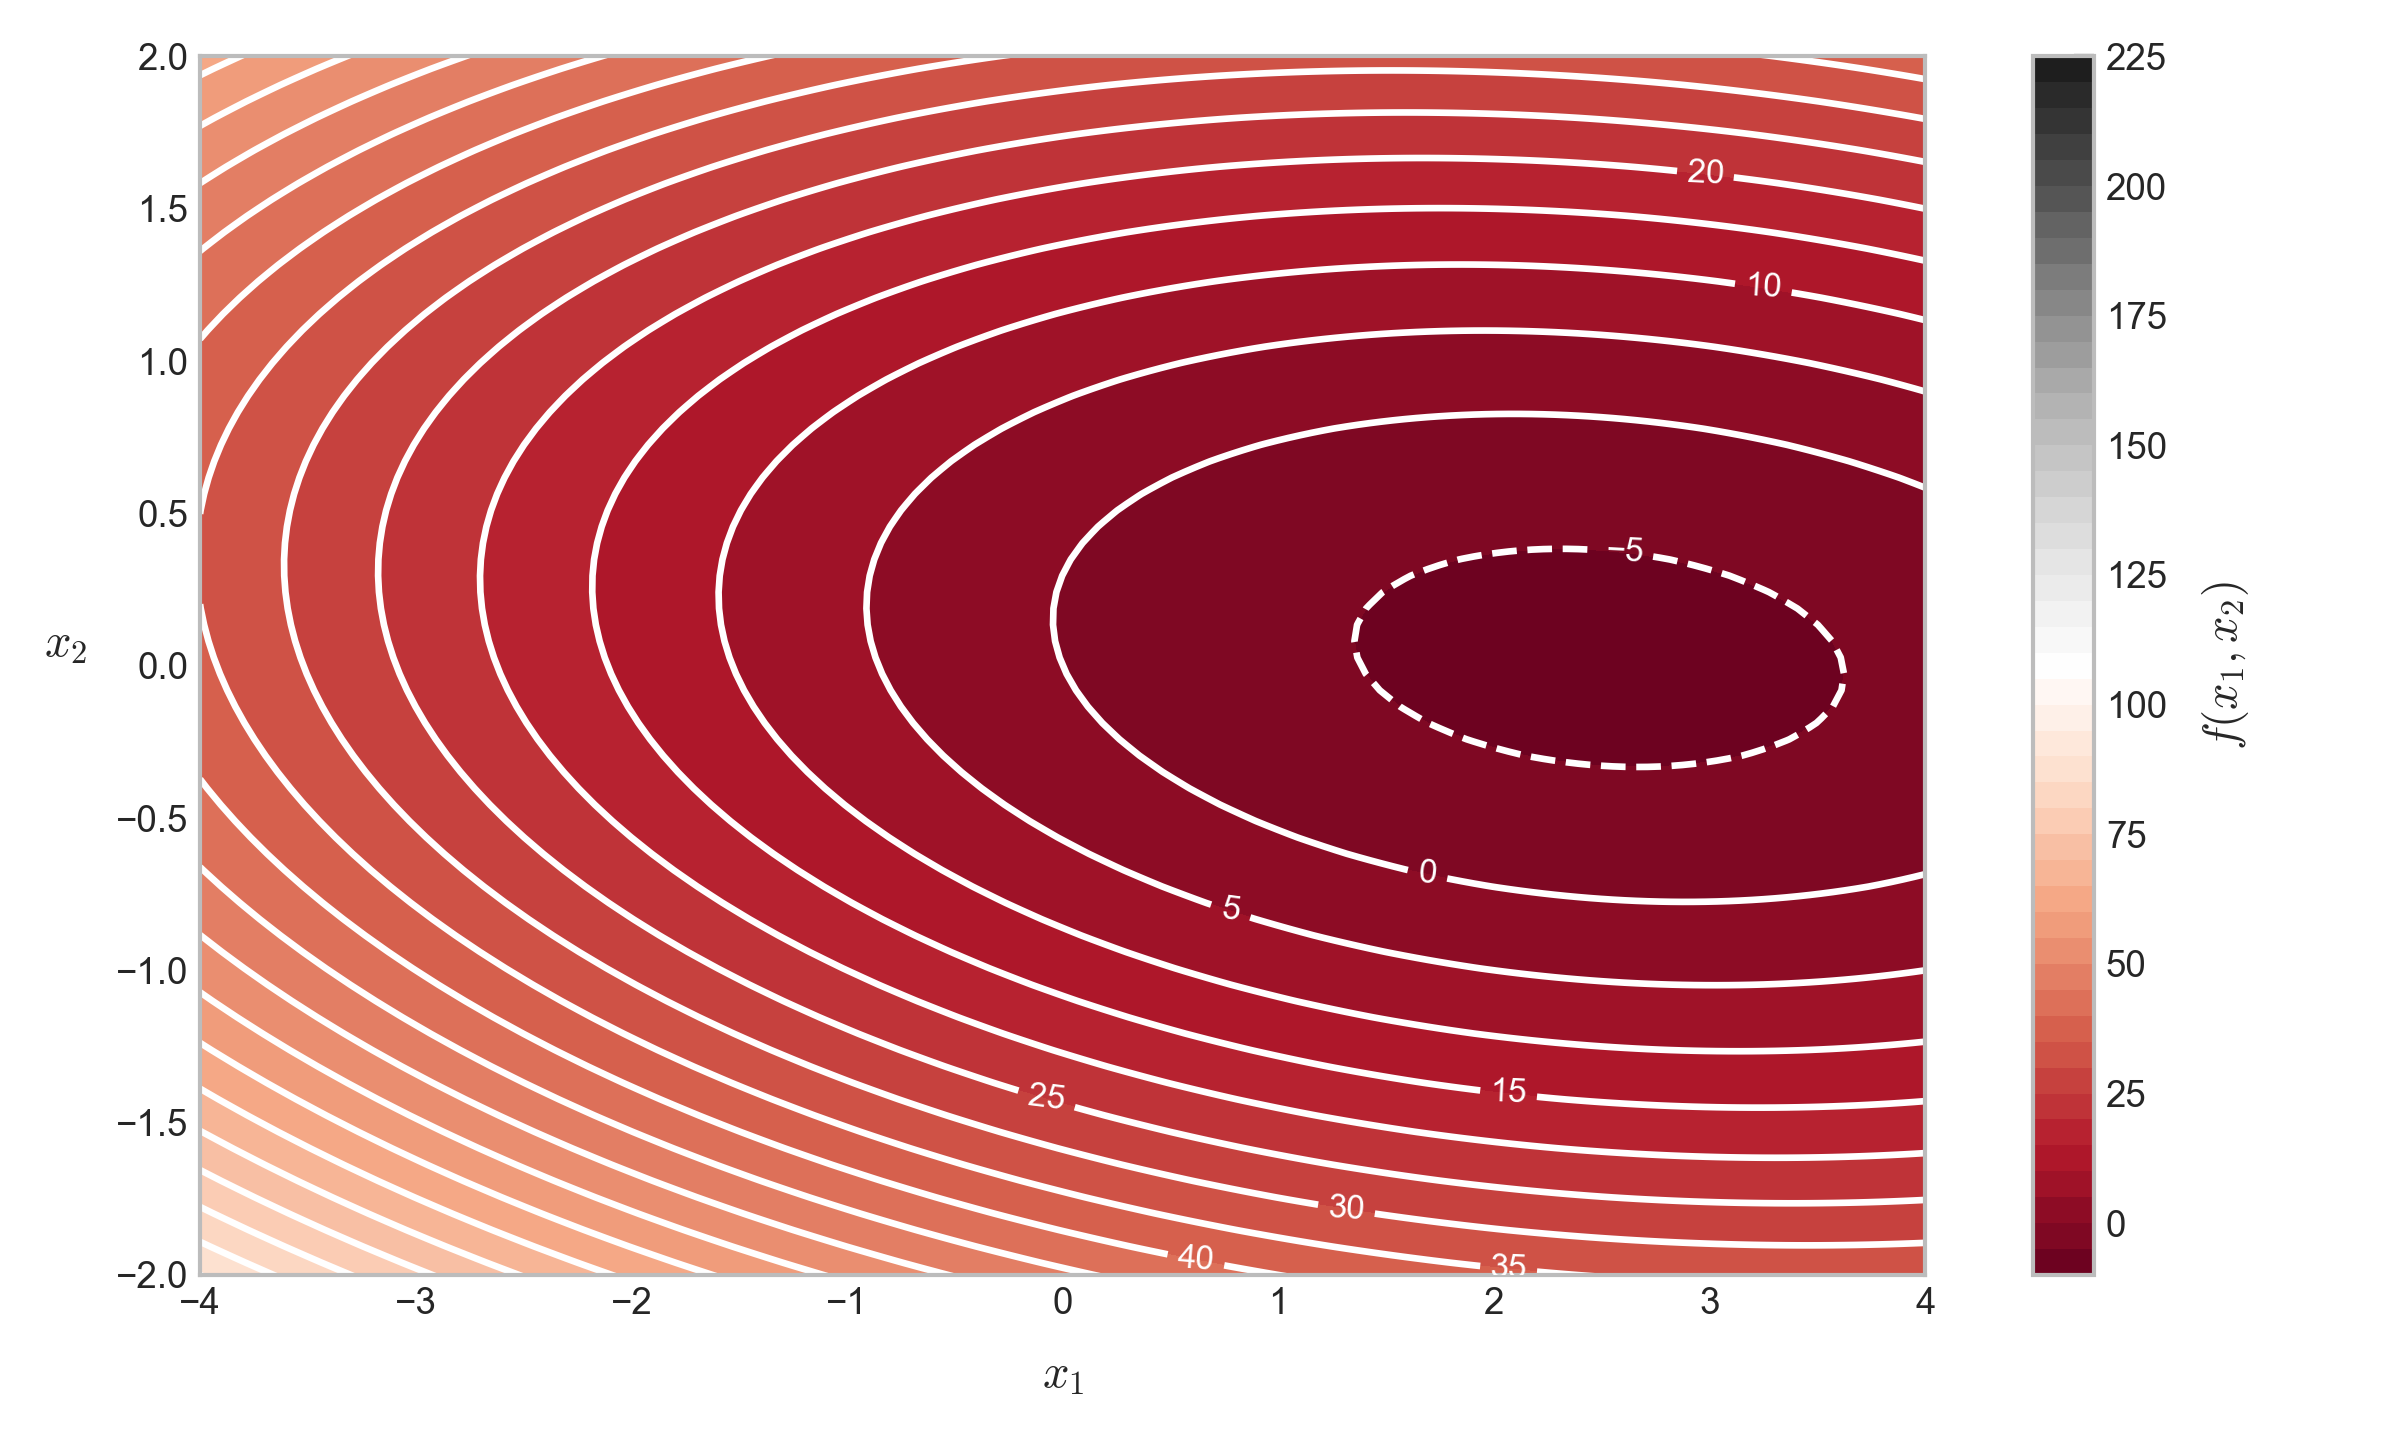

In [17]:
# Construimos el gráfico de f.
fig, ax = plt.subplots(figsize=(10, 6))
p = ax.contourf(X1, X2, Z, levels=50, cmap="RdGy")
r = ax.contour(X1, X2, Z, levels=50, colors="white")
plt.clabel(r, inline=True, fontsize=10)
cb = plt.colorbar(p)
cb.set_label(r"$f(x_1, x_2)$", fontsize=14, labelpad=10, rotation=90)
plt.axis([-4,4,-2,2])
ax.set_xlabel(r"$x_1$", fontsize=14, labelpad=10)
ax.set_ylabel(r"$x_2$", fontsize=14, labelpad=15, rotation=0)
plt.tight_layout();

La gráfica de `f` es la de un paraboloide elíptico cuyo vértice se localiza a la derecha del origen del sistema $\mathbb{R}^{3}$. De esta manera, a partir de las curvas de contorno construidas previamente, sabemos que el mínimo global de `f` se ubica en la región de color marrón del gráfico. Crearemos pues una rutina en Python que emulará el funcionamiento del algoritmo de gradiente descendente, y almacenaremos su progresión en la búsqueda de dicho mínimo global, a fin de poder visualizar la trayectoria del algoritmo en el gráfico anterior:

In [18]:
# Una función que nos permitirá implementar el algoritmo de gradiente descendente desde cero.
# Esta función es exclusiva para problemas en 2D.
def gradient_descent(
    df: sym.Function,
    x0: np.ndarray,
    gamma: float=0.085,
    epsilon: float=0.01,
    max_iter: int=3000,
    init_error: float=10,
):
    # Inicializamos el algoritmo.
    x, y = x0.astype(float)
    curr_iter, iter_coords = 0, [np.hstack([x, y])]
    error = init_error
    curr_x = np.array([x, y])
    
    # Implementamos el algoritmo por medio de un context manager, a fin de controlar
    # simultáneamente la tolerancia y el número máximo de iteraciones.
    while linalg.norm(error) > epsilon and curr_iter < max_iter:
        
        # Avanzamos y trackeamos el valor anterior de la solución x.
        curr_iter = curr_iter + 1
        prev_x = curr_x.copy()
        
        # Ecuación del algoritmo.
        curr_x = curr_x - gamma * np.array(df(x, y))
        x, y = curr_x[0].copy(), curr_x[1].copy() # Actualizamos el valor de x = (x, y).
        error = curr_x - prev_x # Diferencia relativa entre los valores anterior y actual de x.
        iter_coords.append(np.hstack([x, y])) # Registramos la trayectoria del algoritmo.
        
    return curr_iter, curr_x, np.vstack(iter_coords)

Notemos que nuestra implementación del algoritmo de GD requiere del gradiente de la función objetivo (es decir, su(s) derivada(s)). Debido a que hemos definido `f` por medio de una expresión de **<font color='mediumorchid'>Sympy</font>**, el cálculo de las derivadas parciales respectivas es ciertamente sencillo si aplicamos el método `diff()`. De esta manera:

In [19]:
# Calculamos las derivadas parciales de f.
df_dx1 = f.diff(x1)
df_dx2 = f.diff(x2)

In [20]:
# Definimos la solución inicial.
x0 = np.vstack([-3, -1])

In [21]:
# Agrupamos las derivadas anteriores en una lista para construir el gradiente de f.
df = [df_dx1, df_dx2]

In [22]:
# Transformamos el gradiente en una función evaluable.
df_eval = sym.lambdify("x_1, x_2", df)

Y ya podemos implementar el algoritmo de manera directa:

In [23]:
# Implementación del algoritmo de GD.
n_iters, x_sol, trajectory = gradient_descent(df=df_eval, x0=x0)

<IPython.core.display.Javascript object>


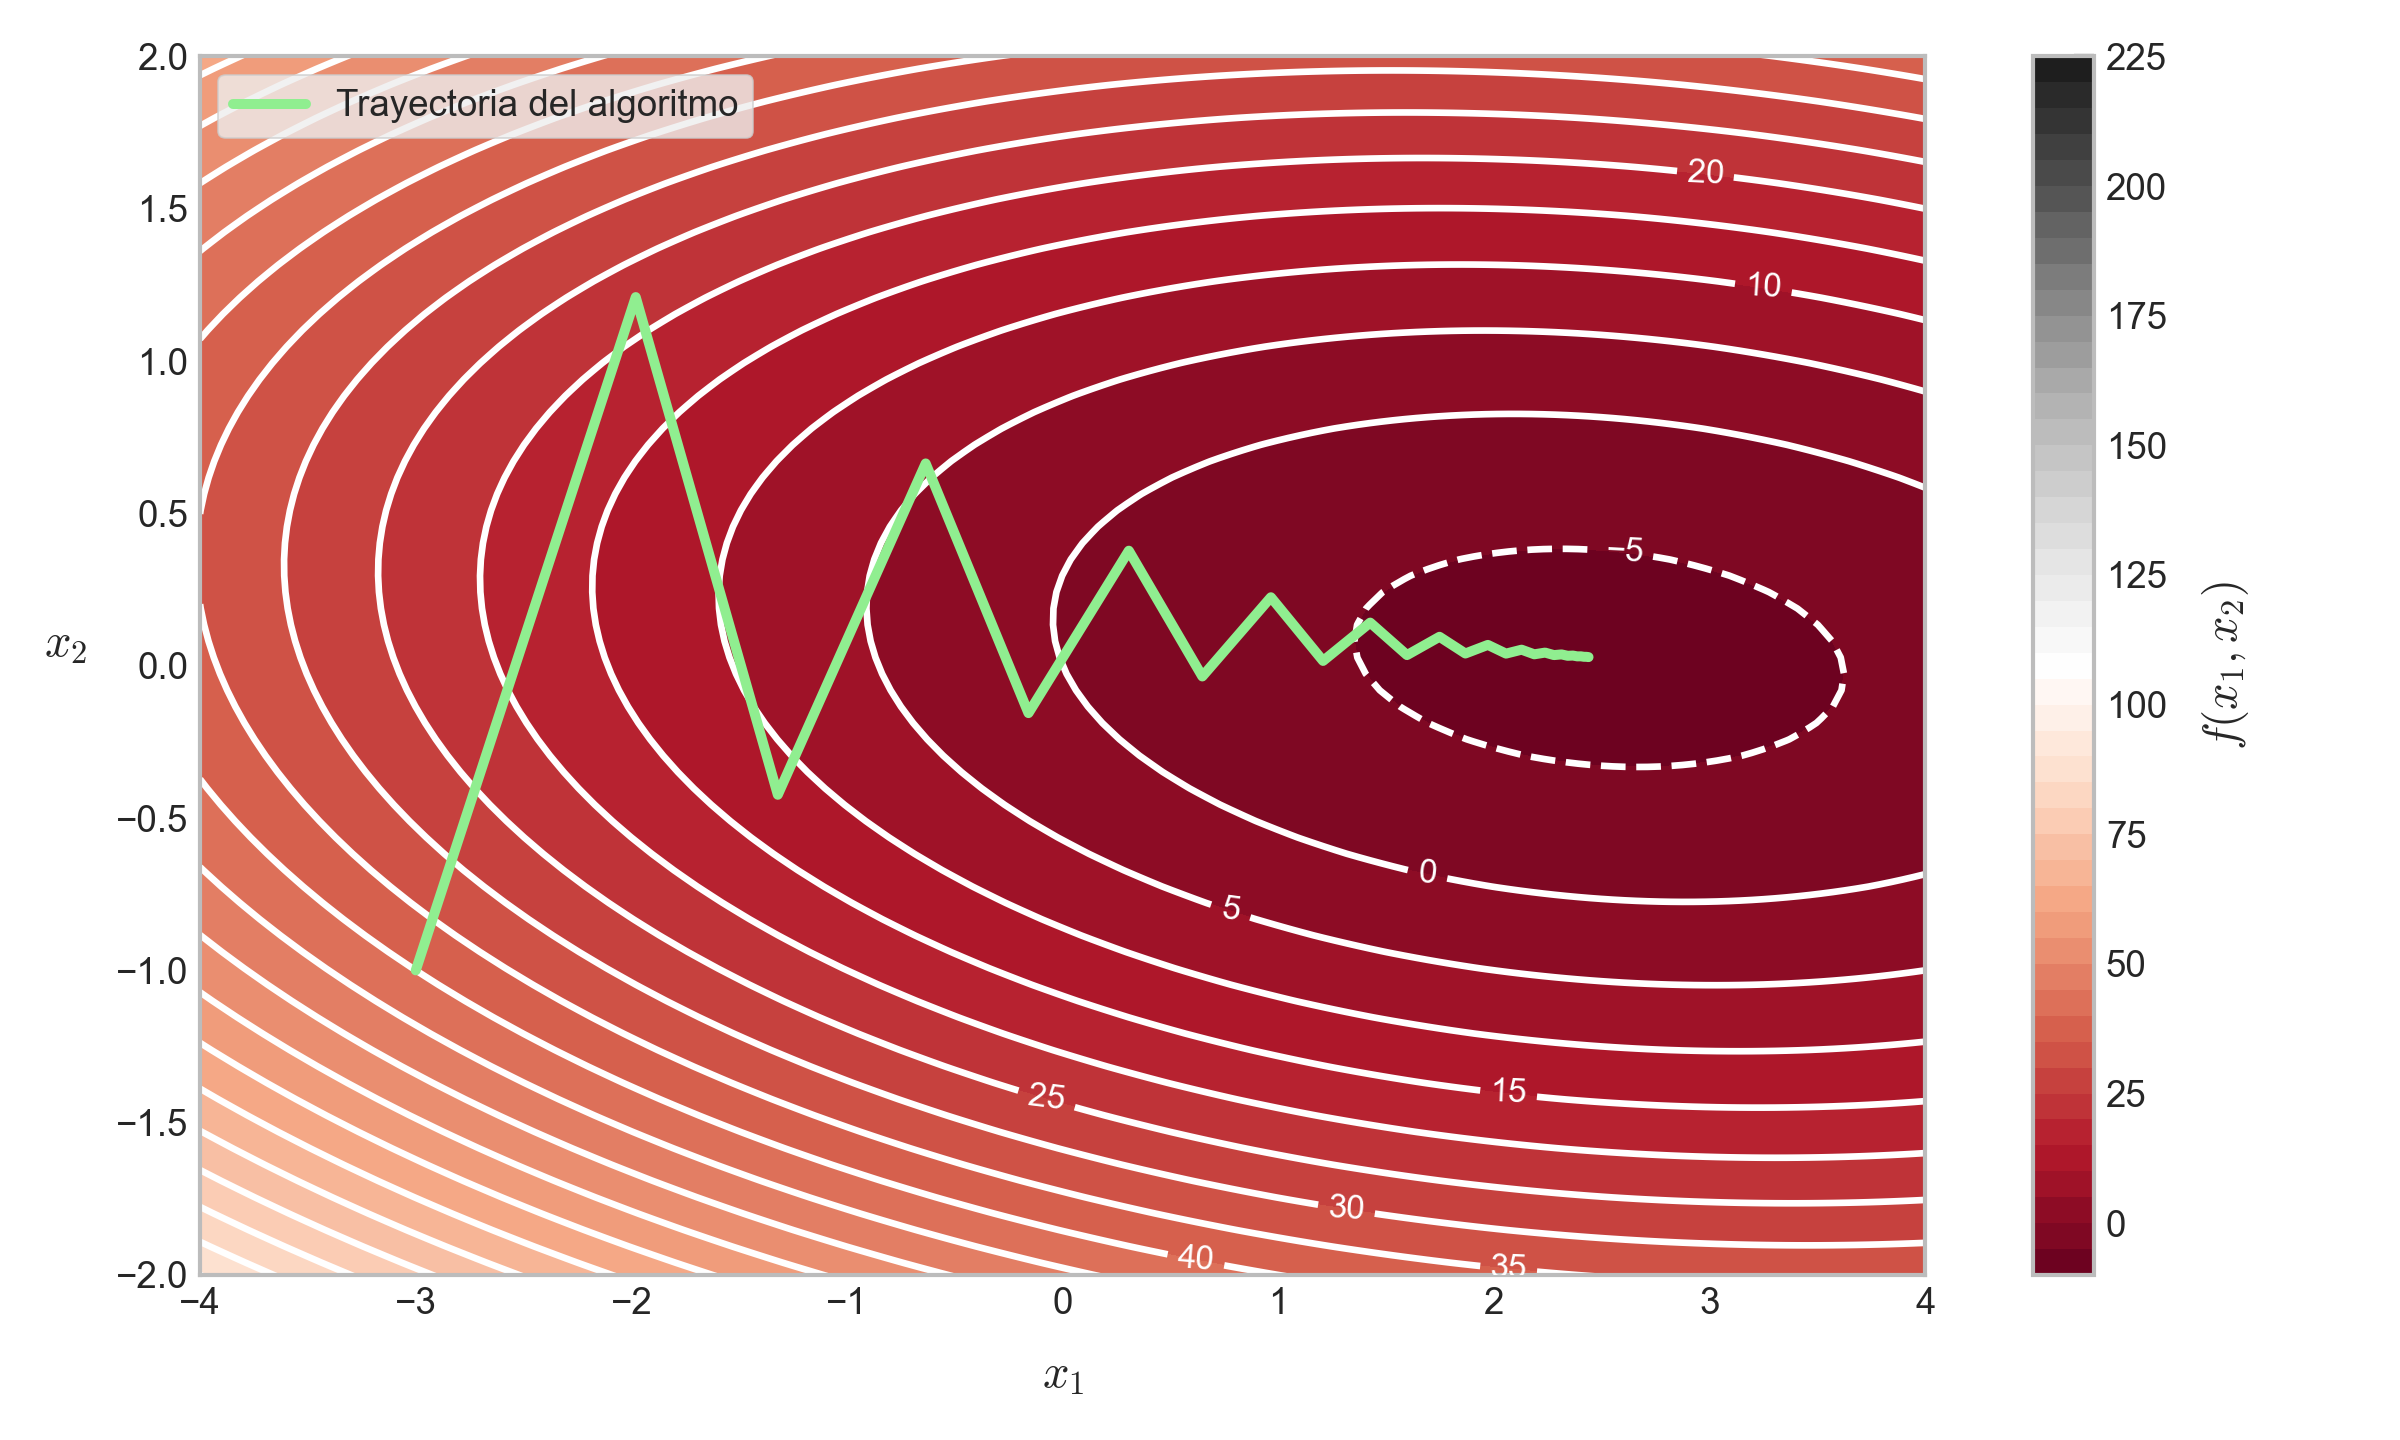

In [24]:
# Construimos el gráfico de f.
fig, ax = plt.subplots(figsize=(10, 6))
p = ax.contourf(X1, X2, Z, levels=50, cmap="RdGy")
r = ax.contour(X1, X2, Z, levels=50, colors="white")
s = ax.plot(trajectory[:, 0], trajectory[:, 1], lw=3, c="lightgreen", label="Trayectoria del algoritmo")
plt.clabel(r, inline=True, fontsize=10)
cb = plt.colorbar(p)
cb.set_label(r"$f(x_1, x_2)$", fontsize=14, labelpad=10, rotation=90)
plt.axis([-4,4,-2,2])
ax.set_xlabel(r"$x_1$", fontsize=14, labelpad=10)
ax.set_ylabel(r"$x_2$", fontsize=14, labelpad=15, rotation=0)
ax.legend(loc="upper left", frameon=True)
plt.tight_layout();

Podemos observar que la trayectoria del algoritmo de gradiente descendente, en este ejemplo particular, es de tipo oscilante, y termina por converger a la solución óptima del problema, que corresponde al mínimo global de `f`. Dicha solución, las iteraciones necesarias para lograrlo, y el valor de `f` en tal punto, son:

In [25]:
# Reportamos los resultados.
print(f"Solución óptima: {np.around(x_sol, 3)}")
print(f"Nº de iteraciones efectuadas: {n_iters}")
print(f"Valor óptimo de f: {f_eval(x_sol[0], x_sol[1])}")

Solución óptima: [[2.438]
 [0.028]]
Nº de iteraciones efectuadas: 26
Valor óptimo de f: [-6.25403361]


◼︎

Es importante considerar que el algoritmo de gradiente descendente suele moverse muy lentamente en el entorno del valor objetivo de nuestro interés. Su **tasa de convergencia asintótica** es significativamente más baja que la de otros métodos. Usando la analogía del punto móvil cuando el correspondiente hipervolumen que describe una función objetivo tiene la forma de un valle largo y de poca pendiente, nos encontramos frente a un **problema que está mal condicionado** y, en estos casos, el algoritmo de gradiente descendente tiende a **zigzaguear a medida que se acerca al óptimo** con progresiones que pueden ser cada vez más pequeñas.

### Tasa de aprendizaje.
Un parámetro importante en el algoritmo GD corresponde al tamaño de los pasos entre iteraciones determinado por un parámetro llamado tasa de aprendizaje, denotada comúnmente como $\gamma$. Este parámetro puede ser fijo o función de ciertas propiedades locales de la función objetivo, y se esquematiza en la Fig. (6.1).

<p style="text-align: center;"><img src="figures/fig_6_1.png" width="500"></p>
<p style="text-align: center;">Fig. (6.1): Esquematización del efecto de la tasa de aprendizaje en el algoritmo de gradiente descendente (Imagen adaptada del hermoso libro *"Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow"*, de Aurélien Geron (2022))</p>

Si la tasa de aprendizaje es muy pequeña, el algoritmo convergerá lentamente, porque tendrá que realizar muchas iteraciones para llegar al valor mínimo que queremos. Por otro lado, si la tasa de aprendizaje es demasiado alta, podríamos saltar el valle y terminar en otro lado. Posiblemente incluso más lejos del mínimo que cuando partimos. Esto podría provocar que el algoritmo diverja, con valores más y más grandes, fallando en encentrar una solución óptima. Ambas situaciones se esquematizan en la Fig. (6.2)

<p style="text-align: center;"><img src="figures/fig_6_2.png" width="1000"></p>
<p style="text-align: center;">Fig. (6.2): La magnitud de la tasa de aprendizaje corresponde a un parámetro definido por el usuario del algoritmo de gradiente descendente (o, en una terminología más propia de la ciencia de datos, un hiperparámetro). Se debe tener cuidado de no usar valores muy grandes ni muy pequeños, a fin de poder controlar de manera óptima la velocidad de convergencia del algoritmo (Imagen adaptada del hermoso libro *"Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow"*, de Aurélien Geron (2022))</p>

Finalmente, no todas las funciones objetivo tienen una apariencia tan regular o bien comportada como las que hemos idealizado en los gráficos anteriores. De hecho, los gráficos de estas funciones pueden tener agujeros, vértices, mesetas y todo tipo de irregularidades en toda su extensión, haciendo que la convergencia a un valor mínimo del algoritmo de GD sea bastante difícil. La Fig. (6.3) ilustra los dos principales desafíos del algoritmo de GD, esquematizados para el caso de una curva plana. Si el algoritmo parte en el lado izquierdo de la curva, entonces convergerá a un **mínimo local**, el cual no es tan bueno como un **mínimo global o absoluto**. Si parte en el lado derecho, entonces tardará bastante en cruzar la meseta. Y si lo detenemos antes, nunca llegará al valor mínimo global que es de nuestro interés.

Lo anterior implica que el algoritmo es, por naturaleza, errático. Por esa razón, la elección el valor de $\gamma$ es importante. Decimos pues que la tasa de aprendizaje $\gamma$ es un **hiperparámetro**: Un parámetro cuyo valor está sujeto a nuestra elección.

<p style="text-align: center;"><img src="figures/fig_6_3.png" width="600"></p>
<p style="text-align: center;">Fig. (6.3): La elección de la tasa de aprendizaje $\gamma$ también puede ser crítica cuando existen funciones objetivo de tipo multimodales (Imagen adaptada del hermoso libro *"Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow"*, de Aurélien Geron (2022))</p>

Existen **métodos adaptativos** que permiten equipar al algoritmo de gradiente descendente una tasa de aprendizaje que varíe en función del número $n$ de iteraciones (es decir, ahora hablamos de una relación del tipo $\gamma(n)$), o bien, en función de las propiedades locales de la función objetivo. Al respecto, existen dos heurísticas sencillas que debemos considerar (Toussaint, 2012):

- Cuando el valor de la función se incrementa después de una iteración (digamos, la $k$-ésima), aquello significa que el paso $\gamma_{k}$ fue demasiado largo. Por lo tanto, requerimos rehacer esta iteración con un valor de $\gamma_{k}$ más pequeño que el que hemos usado.
- Cuando el valor de la función objetivo decrece después de una iteración (digamos, la $k$-ésima), siempre está la posibilidad de que el paso $\gamma_{k}$ haya sido más grande y, por tanto, que la convergencia del algoritmo sea más rápida. Por lo tanto, podemos volver atrás y aumentar el valor de $\gamma_{k}$.

A pesar de que el volver atrás y mejorar los valores de $\gamma_{k}$ puede parecer un desperdicio de recursos, esta sencilla heurística garantiza que el algoritmo de gradiente descendente **siempre converja al mínimo global** de nuestra función objetivo.

**Ejemplo 6.2 – Resolución de un sistema lineal de ecuaciones:** Cuando resolvemos sistemas de ecuaciones lineales de la forma $\mathbf{A}\mathbf{x}=\mathbf{b}$, siendo $\mathbf{A}\in \mathbb{R}^{m\times n}$, $\mathbf{x}\in \mathbb{R}^{n}$ y $\mathbf{b}\in \mathbb{R}^{m}$, en la práctica, lo que hacemos es resolver la ecuación matricial $\mathbf{A}\mathbf{x} - \mathbf{b} = 0$, hallando un valor de $\mathbf{x}$ que minimice el error cuadrático, definido como

$$\left\Vert \mathbf{A} \mathbf{x} -\mathbf{b} \right\Vert^{2}  =\left( \mathbf{A} \mathbf{x} -\mathbf{b} \right)^{\top }  \left( \mathbf{A} \mathbf{x} -\mathbf{b} \right)$$
<p style="text-align: right;">$(6.7)$</p>

Donde la norma utilizada es la Euclidiana (es decir, la norma $\ell_{2}$). El gradiente de la ecuación (6.7) con respecto a $\mathbf{x}$ es

$$\nabla_{\mathbf{x} } \left( \left\Vert \mathbf{A} \mathbf{x} -\mathbf{b} \right\Vert^{2}  \right)  =2\left( \mathbf{A} \mathbf{x} -\mathbf{b} \right)^{\top }  \mathbf{A}$$
<p style="text-align: right;">$(6.8)$</p>

Podemos usar este gradiente de manera directa en el algoritmo de gradiente descendente. Sin embargo, para este caso particular, existe una solución algebraicamente cerrada que resulta de anular el gradiente y despejar el valor de $\mathbf{x}$. Veremos en detalle cómo resolver problemas que involucran al error cuadrático medio como función objetivo más adelante, al estudiar la representación matemática de los datos y su interacción con modelos. ◼︎

Cuando aplicamos soluciones como la presentada en el ejemplo (6.2) para sistemas del tipo $\mathbf{A}\mathbf{x}=\mathbf{b}$, puede ocurrir que el algoritmo de GD presente velocidades de convergencia excepcionalmente bajas. Para acelerar la convergencia del algoritmo a la solución óptima de este problema, es útil observar que su velocidad depende del **número de condición** de la matriz $\mathbf{A}$, el cual se define como

$$\kappa =\frac{\sigma \left( \mathbf{A} \right)_{\mathrm{max} }  }{\sigma \left( \mathbf{A} \right)_{\mathrm{min} }  }$$
<p style="text-align: right;">$(6.9)$</p>

Donde $\sigma \left( \mathbf{A} \right)_{\mathrm{max} }$ y $\sigma \left( \mathbf{A} \right)_{\mathrm{min} }$ son los valores singulares máximo y mínimo, respectivamente, de la matriz $\mathbf{A}$. El número de condición, en esencia, nos permite medir cuan afectado se ve el resultado del sistema $\mathbf{A}\mathbf{x}=\mathbf{b}$ frente a pequeños cambios en las entradas de la matriz $\mathbf{A}$. Si los valores singulares de $\mathbf{A}$ son similares en magnitud, el número de condición $\kappa$ será cercano a 1, en cuyo caso diremos que la matriz $\mathbf{A}$ está **bien condicionada**. Por otro lado, si los valores singulares de $\mathbf{A}$ son muy distintos en magnitud, $\kappa$ será significativamente distinto de 1, en cuyo caso diremos que la matriz $\mathbf{A}$ está **mal condicionada**.

En términos geométricos, el número de condición $\kappa$ nos informa acerca de la magnitud de la curvatura local en el hipervolumen descrito por la función $g\left( \mathbf{x} \right)  =\left\Vert \mathbf{A} \mathbf{x} -\mathbf{b} \right\Vert^{2}$. En este caso, el valor de $\kappa$ es inversamente proporcional a esta curvatura local, lo que implica que problemas con una matriz de coeficientes $\mathbf{A}$ mal condicionada, por extensión, también son mal condicionados. Esto, naturalmente, empata con nuestra noción de que los problemas mal condicionados son aquellos en los cuales el hipervolumen descrito por la función objetivo presenta valles de poca pendiente y anormalmente largos; es decir, se curvan mucho en una dirección, y son anormalmente planos en la otra. En vez de resolver directamente el sistema $\mathbf{A}\mathbf{x}=\mathbf{b}$, podríamos resolver el sistema equivalente $\mathbf{P}^{-1}(\mathbf{A}\mathbf{x}-\mathbf{b})=\mathbf{0}$, donde la matriz $\mathbf{P}$ se conoce como **matriz pre-acondicionadora del sistema**. El objetivo de esta transformación es diseñar $\mathbf{P}^{-1}$ de tal manera que $\mathbf{P}^{-1}\mathbf{A}$ sea una matriz mejor condicionada que $\mathbf{A}$ y que, al mismo tiempo, sea más sencilla de computar.